# Первое задание

## Image -> numpy array

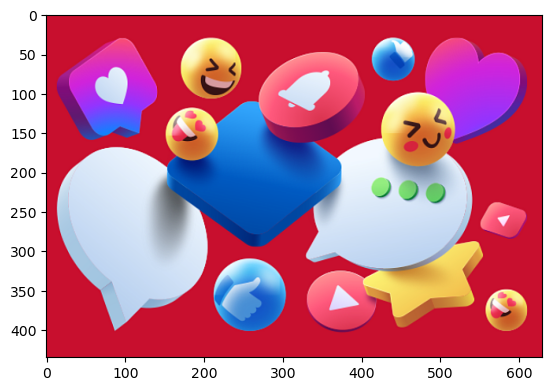

In [14]:
from PIL import Image
from matplotlib.pyplot import figure, imshow, show
import numpy as np

def get_image() -> np.array:
    image = Image.open("example.png")
    image_array = np.array(image)[:, :, :3]
    return image_array


def show_image(array: np.array):
    figure()
    imshow(array, cmap='Greys')
    


show_image(get_image())

## Инвертирование изображения 

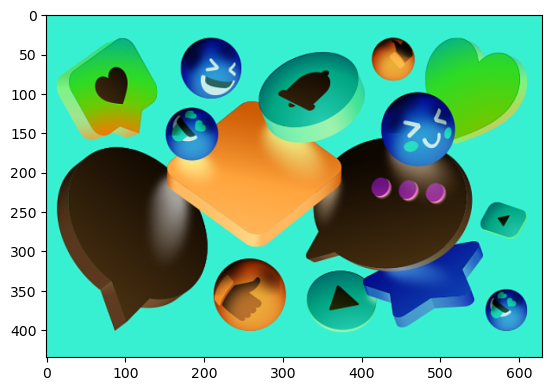

In [15]:
from PIL import Image
import numpy as np

def get_negative_image():
    image_array = get_image()
    return 255 - image_array

show_image(get_negative_image())

## Полутон

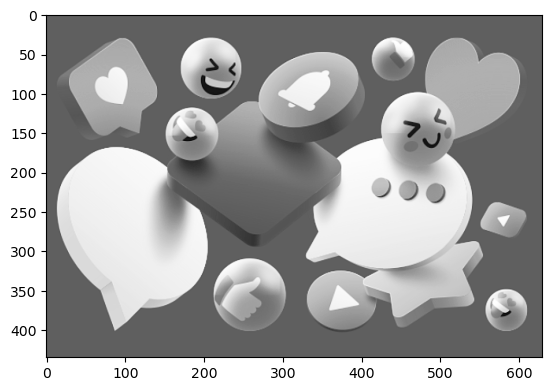

In [16]:

from PIL import Image
import numpy as np

def get_halftone_image() -> np.array:
    image_array = get_negative_image()
    mean = np.mean(image_array, axis=2, dtype=int)
    return mean

show_image(get_halftone_image())

## Добавление шума

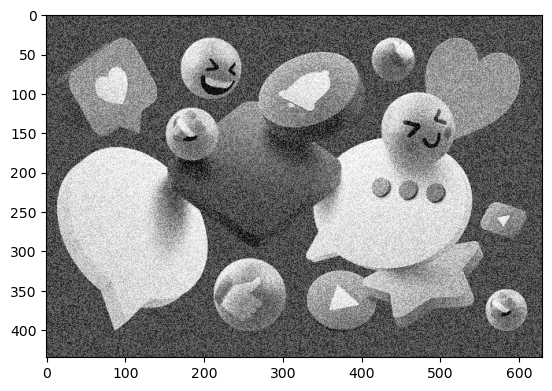

In [17]:
import random
from PIL import Image
import numpy as np


def get_noise_image(mean: float = 50, sigma: float = 5, data_type=float) -> np.array:
    halftone_image_array = get_halftone_image()
    return np.clip(np.array([np.array([pixel + random.gauss(mean, sigma) * random.randint(0, 1) for pixel in row], dtype=data_type)
                     for row in halftone_image_array]), 0, 255)

show_image(get_noise_image())

## Построение гистограммы

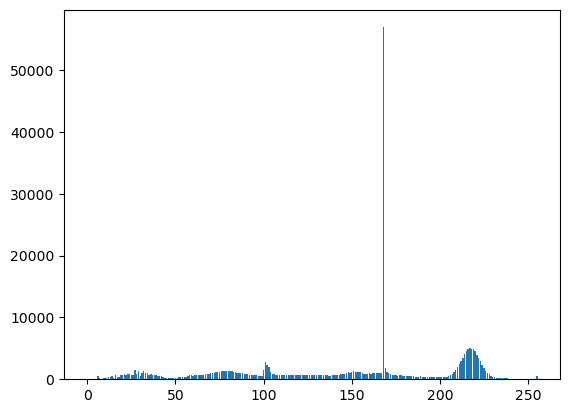

In [18]:
import random
from collections import Counter

from matplotlib.pyplot import bar
import numpy as np
import numpy.typing as npt
from PIL import Image


noise_appended_array = get_noise_image(data_type=int)

def draw_hist(data: npt.NDArray[int]):
    cnt = Counter(data.reshape(-1))
    x = list(range(256))
    y = [cnt.get(el, 0) for el in x]
    bar(x, y)

draw_hist(noise_appended_array)

## Размытие фильтром Гаусса

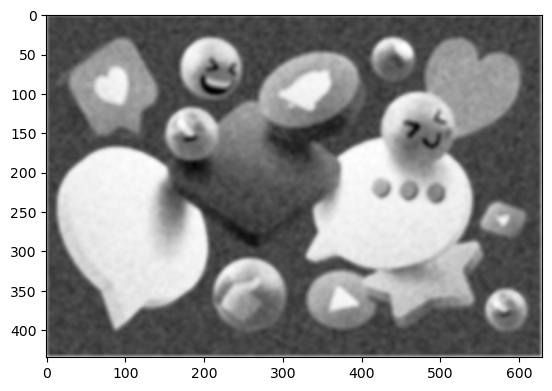

In [19]:
import numpy as np
from PIL import Image


image_array = get_noise_image()

def image_filter(K_size, sigma, im):
    H, W = im.shape
    
    pad = K_size // 2
    out = np.zeros((H + pad * 2, W + pad * 2), np.float64)
    out[pad: pad + H, pad: pad + W] = im.copy().astype(np.float64)

    K = np.zeros((K_size, K_size), np.float64)
    for x in range(-pad, -pad + K_size):
        for y in range(-pad, -pad + K_size):
            K[x + pad, y + pad] = np.exp( -(x * x + y * y) / (2 * (sigma * sigma)))
    K /= 2 * np.pi * sigma * sigma
    K /= K.sum()
 
    tmp = out.copy()
  
    for y in range(H):
        for x in range(W):
            out[pad + y, pad + x] = np.sum(K * tmp[y: y + K_size, x: x + K_size])
    out = np.clip(out, 0, 255).astype(int)
    return out[pad: pad + H, pad: pad + W]


show_image(image_filter(10, 2.8, image_array))

## Нерезкое размытие

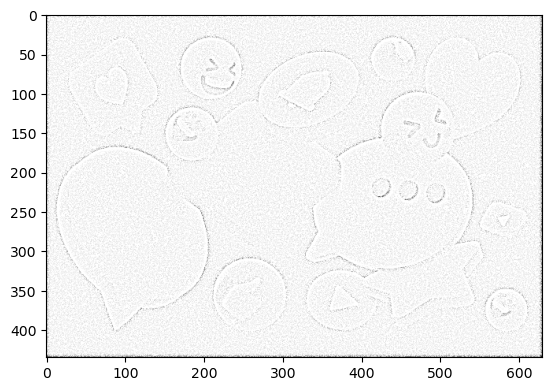

In [20]:
def soft_blur(origin_image_array: npt.NDArray[int], blurred_image_array: npt.NDArray[int]):
    return np.clip(origin_image_array - blurred_image_array, 0, 255)


origin_image = get_noise_image()
blurred_image = image_filter(10, 2.8, origin_image)
soft_blur_image = soft_blur(origin_image, blurred_image)
show_image(soft_blur_image)


## Выравнивание гистограммы

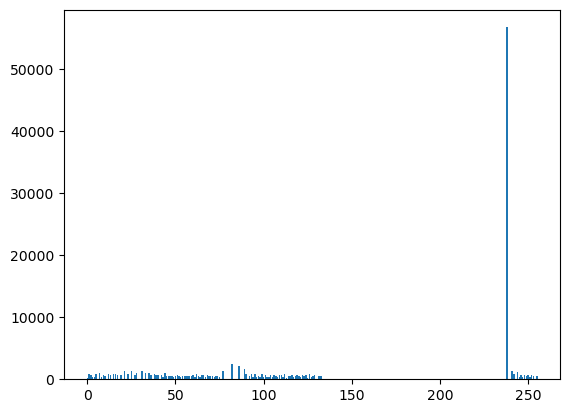

In [21]:
def hist_equalization(image_array: npt.NDArray[int]):
    row = image_array.reshape(-1)
    cnt = Counter(row)
    sum_list = []
    sum_temp = 0
    for i in range(256):
        sum_temp += cnt.get(i, 0)
        sum_list.append(sum_temp)
    result = np.array([int(255 * sum_list[i] / sum_temp) for i in range(256)])
    values = [cnt.get(i, 0) for i in range(256)]
    returned = [0] * 256
    for r, v in zip(result, values):
        returned[r] += v
    bar(range(256), returned)


hist_equalization(get_noise_image())